In [82]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
X_train, Y_train = load_fashion_mnist("./fashionmnist/", kind = 'train')
X_test, Y_test = load_fashion_mnist("./fashionmnist/", kind = 't10k')

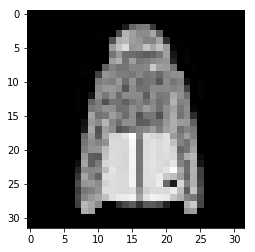

In [302]:


test  = X_train[22].reshape((28,28))
im_bg = np.zeros((32, 32))
pad_top, pad_left = 2,2
height, width = 28, 28
im_bg[pad_top:pad_top + height,
      pad_left:pad_left + width] = test
test = im_bg
plt.imshow(test, cmap="gist_gray")
plt.show()

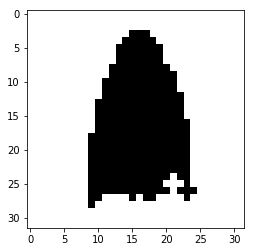

In [303]:
from skimage import filters
from skimage import exposure
from skimage import morphology
from skimage import filters

filtered = filters.sobel_h(test)
filtered = exposure.equalize_hist(test)
filtered = morphology.binary_erosion(test, morphology.diamond(1)).astype(np.uint8)
filtered = morphology.binary_dilation(test, morphology.diamond(1)).astype(np.uint8)
#https://www.scipy-lectures.org/packages/scikit-image/
filtered = morphology.binary_opening(test, morphology.diamond(1)).astype(np.uint8)
val = filters.threshold_otsu(test)
mask = test < val
filtered = morphology.binary_dilation(mask, morphology.diamond(1)).astype(np.uint8)
#from skimage import measure
#all_labels = measure.label(test)
#import scipy.ndimage as scimg
#filtered = scimg.measurements.label(filtered)[0]
import scipy.ndimage as scimg
scimg.measurements.center_of_mass(filtered)
boundaries = skimage.segmentation.find_boundaries(filtered,mode = 'thick')
#sob = ndimage.sobel(test, mode ='wrap')
plt.imshow(filtered, cmap="gist_gray")
plt.show()


#Statistical measures: • Entropy
#• Homogeneity • Contrast
#– Wavelets – Fractals

In [320]:
label_im, nb_labels = ndimage.label(mask)
nb_labels

2

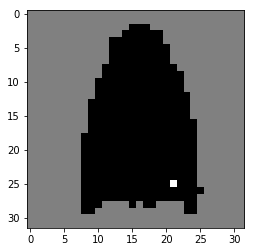

In [322]:
plt.imshow(label_im, cmap="gist_gray")
plt.show()

In [326]:
sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
mean_vals = ndimage.sum(test, label_im, range(1, nb_labels + 1))

In [328]:
sizes

array([  0., 657.,   1.])

In [329]:
#https://www.kaggle.com/lorinc/feature-extraction-from-images
#https://www.kaggle.com/lorinc/feature-extraction-from-images-2
#https://github.com/rempic/Image-Features-Extraction
#http://scikit-image.org/docs/dev/auto_examples/
#http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_regionprops.html#sphx-glr-auto-examples-segmentation-plot-regionprops-py
#https://www.kaggle.com/c/digit-recognizer/discussion/2308
#binary_closing
#binary_closing
#binary_dilation
#binary_erosion
#binary_fill_holes
#binary_opening
#scimg.morphology.distance_transform_cdt
# http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html
#http://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html#sphx-glr-auto-examples-edges-plot-circular-elliptical-hough-transform-py

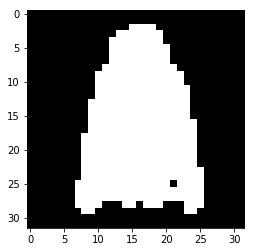

In [338]:
mask = test > test.mean()
plt.imshow(mask, cmap="gist_gray")
plt.show()


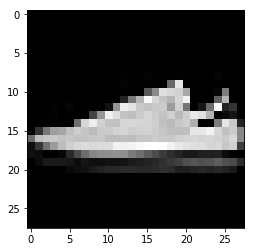

In [359]:
test = X_train[6].reshape((28,28))
plt.imshow(test, cmap="gist_gray")
plt.show()

In [360]:
import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy

rgbImg = io.imread('https://i.stack.imgur.com/1xDvJ.jpg')
grayImg = img_as_ubyte(color.rgb2gray(rgbImg))

distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
properties = ['energy', 'homogeneity']

glcm = greycomatrix(grayImg, 
                    distances=distances, 
                    angles=angles,
                    symmetric=True,
                    normed=True)

feats = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])

feats

/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/opt/conda/lib/python3.6/site-packages/skimage/feature/texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


array([0.0259624 , 0.02067853, 0.02372559, 0.02059698, 0.02010074,
       0.02067853, 0.01804043, 0.02059698, 0.01733382, 0.0159625 ,
       0.01570585, 0.01604591, 0.31842885, 0.2433545 , 0.29764407,
       0.23893886, 0.22182798, 0.2433545 , 0.19260107, 0.23893886,
       0.17508638, 0.15973481, 0.14914282, 0.15645177])

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


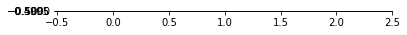

blob_dog


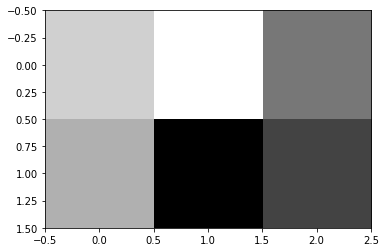

blob_doh


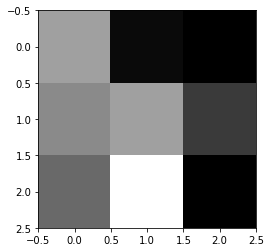

blob_log


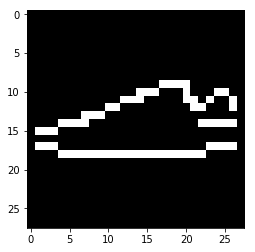

canny


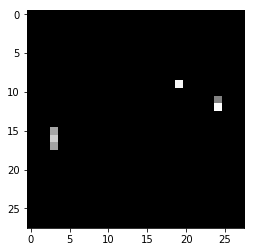

corner_fast


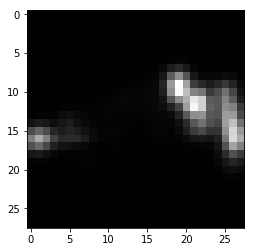

corner_foerstner


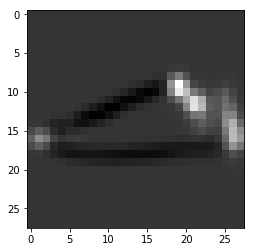

corner_harris


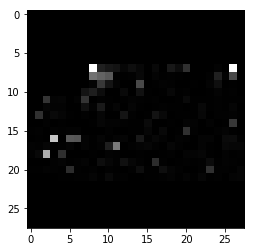

corner_kitchen_rosenfeld


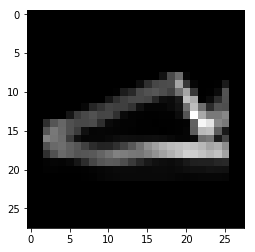

corner_moravec


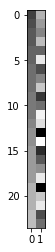

corner_peaks


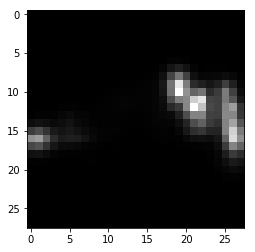

corner_shi_tomasi


/opt/conda/lib/python3.6/site-packages/skimage/feature/corner.py:166: UserWarning: deprecation warning: the default order of the hessian matrix values will be "row-column" instead of "xy" starting in skimage version 0.15. Use order="rc" or order="xy" to set this explicitly
  warn('deprecation warning: the default order of the hessian matrix values '


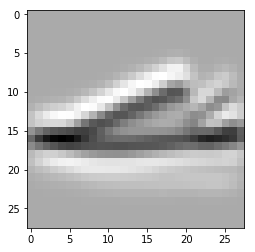

hessian_matrix


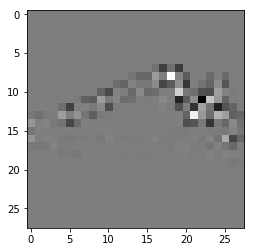

/opt/conda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


hessian_matrix_det


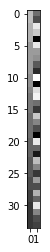

peak_local_max


/opt/conda/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: invalid value encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))


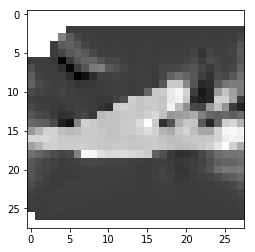

shape_index


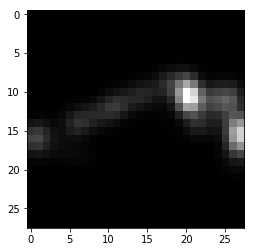

structure_tensor


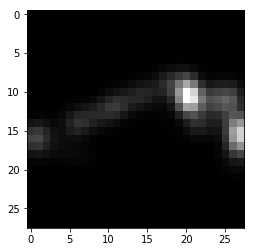

structure_tensor_eigvals


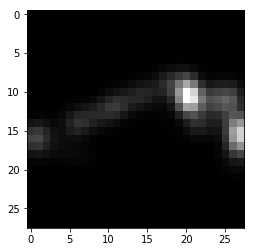

template


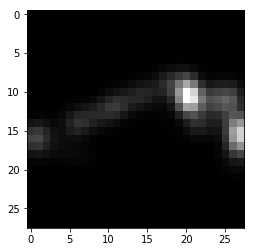

texture


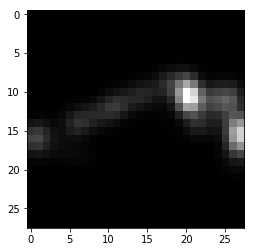

util


In [361]:
for x in dir(skimage.feature):
    try:
        b = eval("skimage.feature." + x + "(test)")
        plt.imshow(b, cmap="gist_gray")
        plt.show()
        print(x)
    except Exception as e:
        try:
            plt.imshow(b[0], cmap="gist_gray")
            plt.show()
            print(x)
        except:
            pass
        #print(e)
        #print(b)
        #print(x)

In [366]:
test_data = [skimage.feature.hog(x.reshape(28,28)) for x in X_train]

/opt/conda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


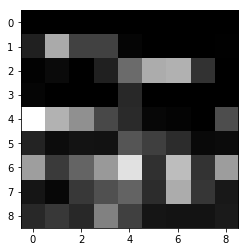

In [377]:
hog = test_data[0].reshape(9,9)
plt.imshow(hog, cmap="gist_gray")
plt.show()

In [382]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(test_data)
principalComponents = pca.fit_transform(test_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [389]:
finalDf = principalDf['target'] = Y_train

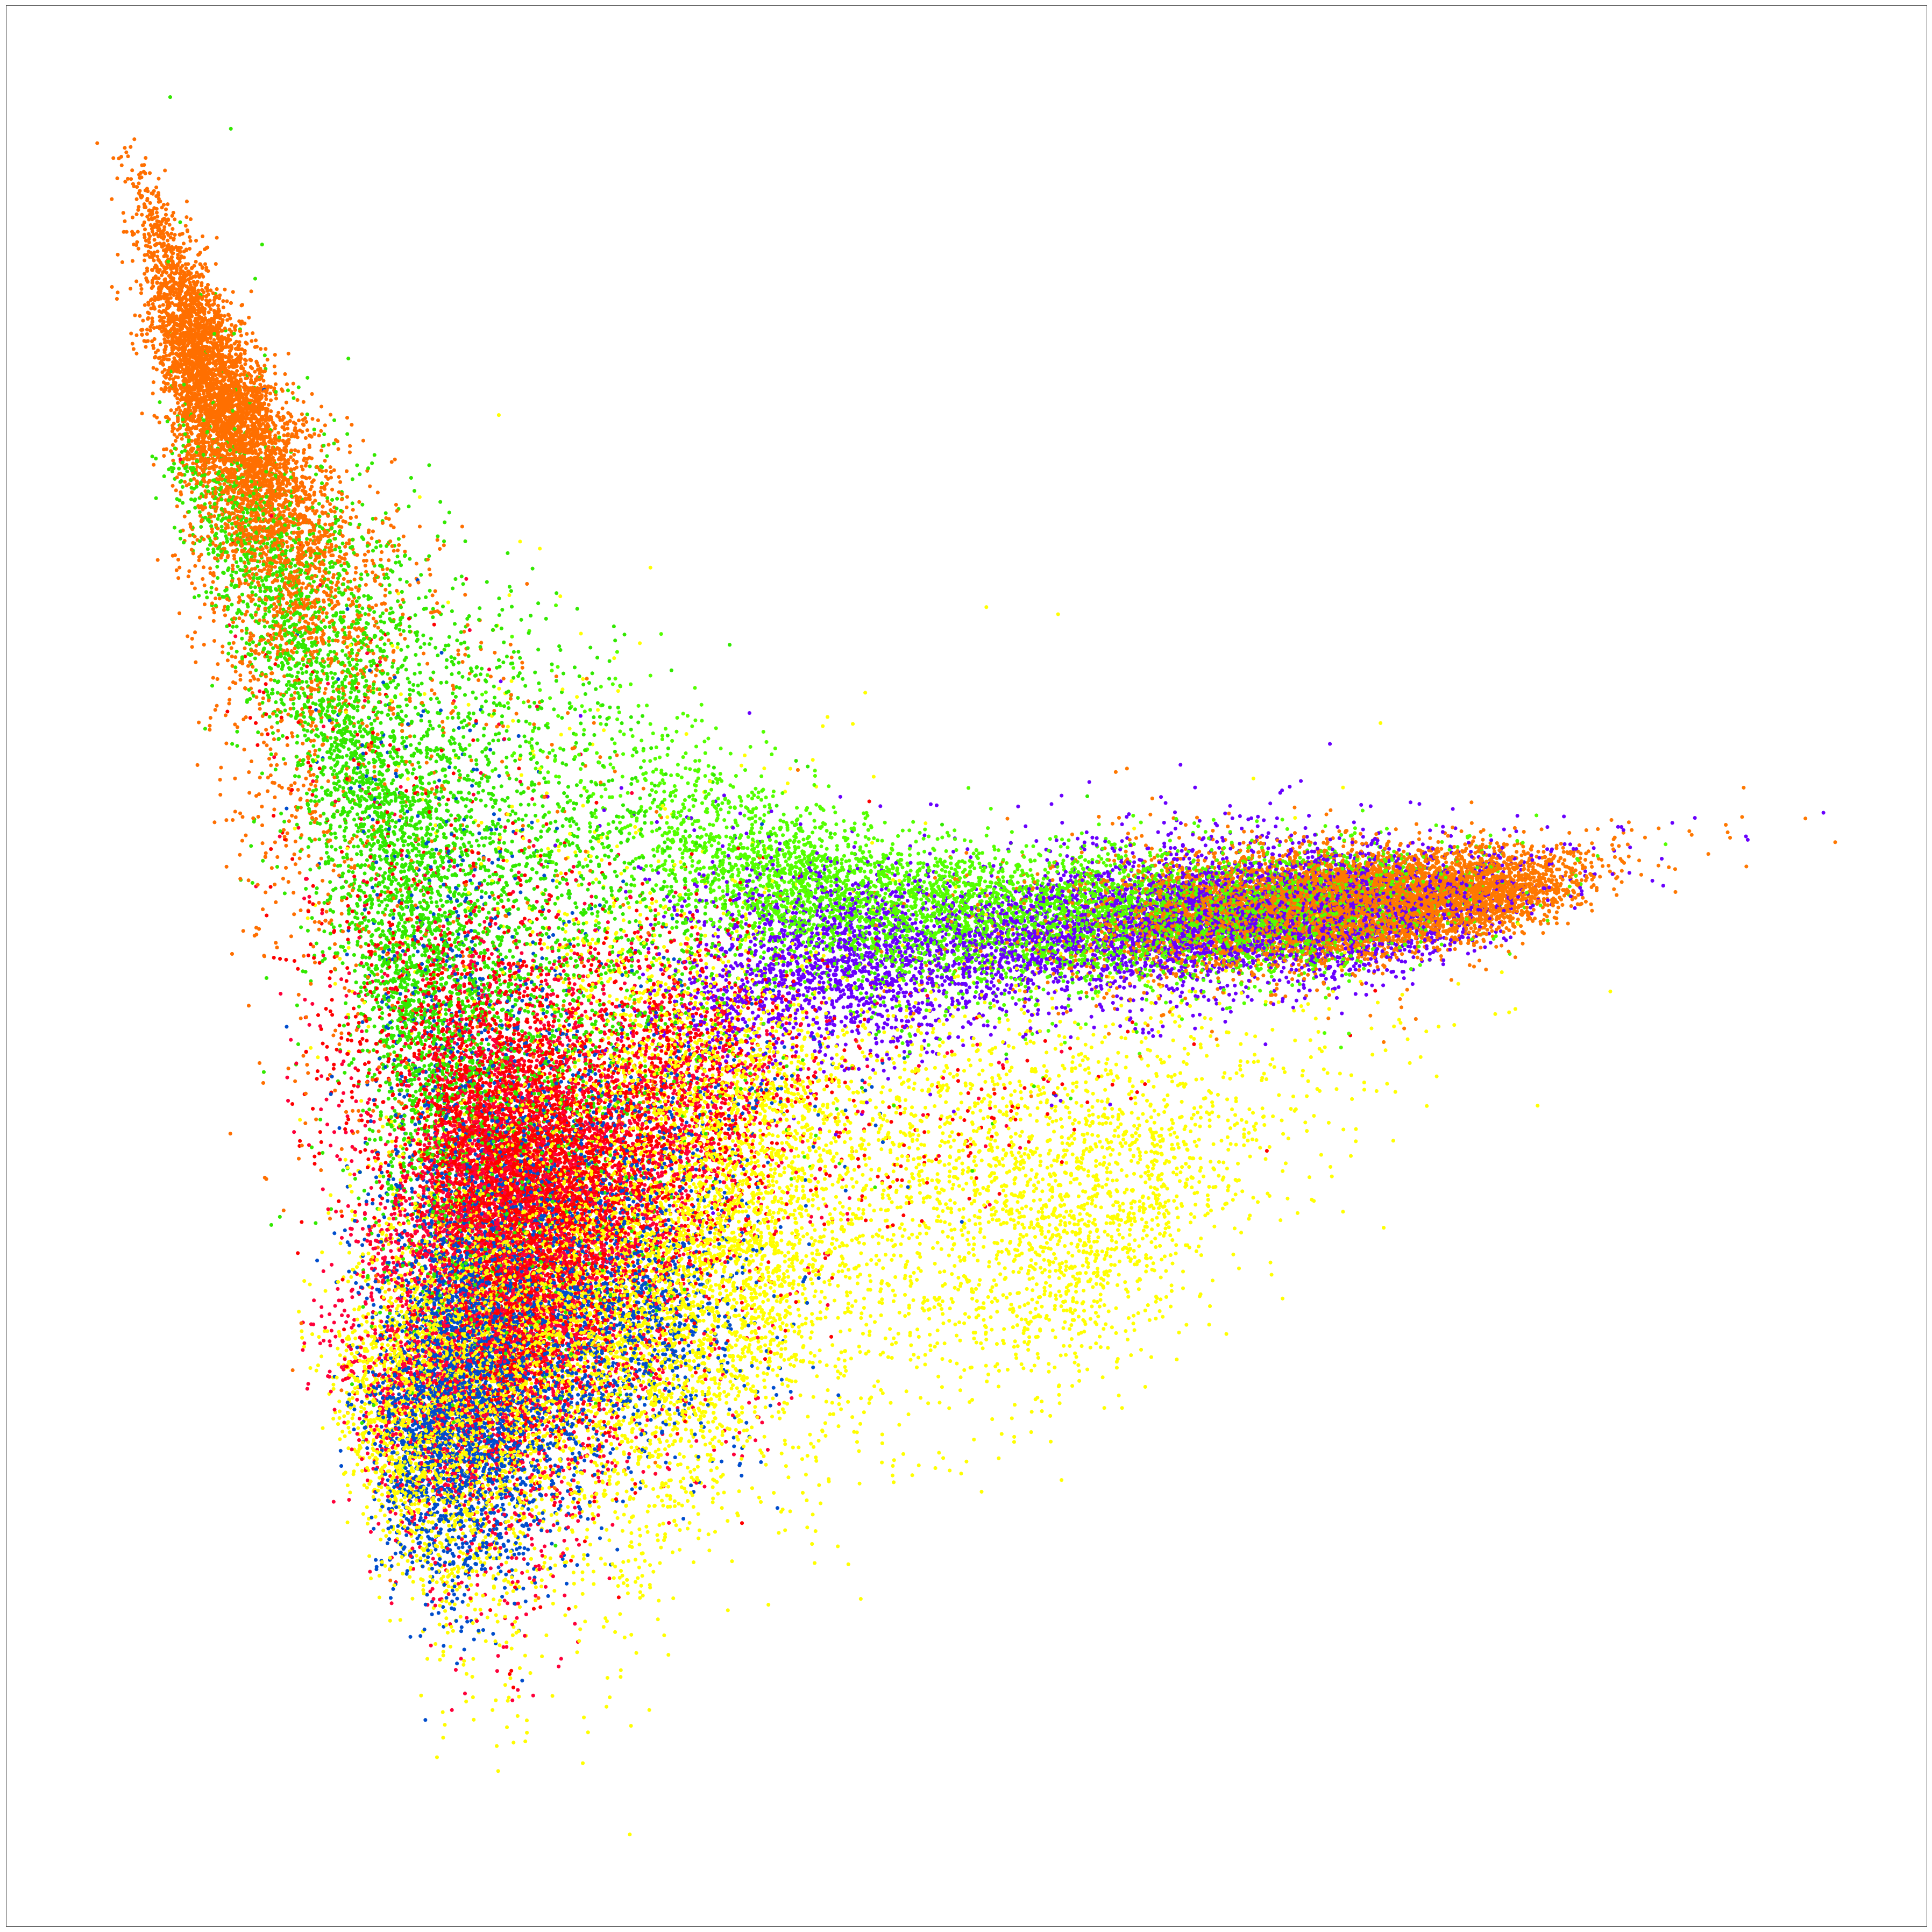

In [392]:
fig, plot = plt.subplots()
fig.set_size_inches(50, 50)
plt.prism()


plot.scatter(principalComponents[:, 0], principalComponents[:, 1], c=Y_train)
plot.set_xticks(())
plot.set_yticks(())

plt.tight_layout()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [374]:
print(pca.explained_variance_ratio_) 

[0.33593708 0.18634319 0.06717489]


In [ ]:
for x in dir(skimage.feature):
    try:
        b = eval("skimage.feature." + x + "(test)")
        plt.imshow(b, cmap="gist_gray")
        plt.show()
        print(x)
    except Exception as e:
        print(e)

In [36]:
def limits(mask):
	# Compute some basic cross-section quantities:
	# left edge, right edge, center, span, width, number of gaps/holes, and width of largest hole.
	if not mask.any():
		return [0, 99, 99, 99, 0, 99, 99]
	indices = np.where(mask)[0]
	lo, hi = np.min(indices), np.max(indices)
	width_filled = np.sum(mask)
	width_total = hi - lo
	mean = np.mean(indices)
	ngaps = np.sum(indices[1:] - indices[:-1] != 1)
	if len(indices) > 1:
		largestgapsize = np.max(indices[1:] - indices[:-1])
	else:
		largestgapsize = 1
	return [lo, hi, mean, width_filled, width_total, ngaps, largestgapsize]

limits(test)

[0, 27, 13.548843187660669, 115755, 27, 750, 1]

In [38]:
limits(test)

[0, 27, 13.491048593350383, 167394, 27, 754, 1]

In [70]:
def imagefeature(img):
    # calls the above function with a few thresholds
    # lets measure a few things:
    img_mid = np.median(img)
    img_max = np.max(img)
    thresh_lo = img_mid - 3 * np.std(img[img <= img_mid])
    thresh_hi = img_max / 3.
    thresh_vhi = img_max * 3. / 4.
    features = []
    #print(thresh_lo, thresh_hi, thresh_vhi)
    for thresh in thresh_lo, thresh_hi, thresh_vhi:
        mask = img > thresh
        x = np.any(mask, axis=1)
        xlo, xhi, _, _, _, _, _ = limits(x)
        #print(mask)
        y = np.any(mask, axis=0)
        ylo, yhi, _, _, _, _, _ = limits(y)
        # measure width at 1/6, 2/6, 3/6, 4/6, 5/6
        # measure also the the number of holes
        features += limits(mask[:,int(ylo*5/6.+yhi*1/6.)])
        features += limits(mask[:,int(ylo*4/6.+yhi*2/6.)])
        features += limits(mask[:,int(ylo*3/6.+yhi*3/6.)])
        features += limits(mask[:,int(ylo*2/6.+yhi*4/6.)])
        features += limits(mask[:,int(ylo*1/6.+yhi*5/6.)])
        features += limits(mask[int(xlo*5/6.+xhi*1/6.),:])
        features += limits(mask[int(xlo*4/6.+xhi*2/6.),:])
        features += limits(mask[int(xlo*3/6.+xhi*3/6.),:])
        features += limits(mask[int(xlo*2/6.+xhi*4/6.),:])
        features += limits(mask[int(xlo*1/6.+xhi*5/6.),:])
        # 0123456789

        # mark the quadrant where most ink is
        i, j = np.where(mask)
        #ictr = (numpy.mean(i) - (xhi+xlo)/2.) / (xhi - xlo+1)
        ictr = int(np.mean(i))
        #jctr = (numpy.mean(j) - (yhi+ylo)/2.) / (yhi - xlo+1)
        jctr = int(np.mean(j))
        features += [int(ictr), int(jctr)]
    return features

In [75]:
#!pip install opencv-python

In [80]:
import tensorflow as tf

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [81]:
tf.contrib.keras.preprocessing.image.

SyntaxError: invalid syntax (<ipython-input-81-17fae983487e>, line 1)